In [69]:
from xfoil import XFoil

xfoil_object = XFoil(["data/best_cl_airfoil.dat", "data/best_cd_airfoil.dat", "data/best_cl_o_cd_airfoil.dat"], 0, 3e6, [7, 10, 0.1], 
                     disable_graphics=True, max_iterations=300)
xfoil_object.run()

In [70]:
print(xfoil_object.results)
best_cl = xfoil_object.results[0]['result']
best_cd = xfoil_object.results[1]['result']
best_cl_o_cd = xfoil_object.results[2]['result']

{2: {'metadata': {'name': 'data/best_cl_o_cd_airfoil.dat', 'mach': 0.0, 'reynolds': 3000000, 'alphas': array([ 7. , 10. ,  0.1]), 'panels': 300, 'n_crit': 9, 'max_iterations': 300, 'save_name': None}, 'result': {'alpha': [7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], 'CL': [1.5579, 1.5687, 1.5795, 1.5904, 1.6012, 1.612, 1.6227, 1.6332, 1.6437, 1.6539, 1.6639, 1.6736, 1.6826, 1.6897, 1.693, 1.687, 1.6666, 1.6463, 1.6331, 1.6193, 1.6069, 1.5996, 1.5896, 1.581, 1.573, 1.5686, 1.5649, 1.5607, 1.5609, 1.5603, 1.5593], 'CD': [0.00439, 0.0044, 0.00441, 0.00442, 0.00443, 0.00445, 0.00447, 0.00449, 0.00452, 0.00455, 0.00459, 0.00464, 0.00471, 0.00483, 0.00506, 0.00554, 0.00636, 0.00761, 0.00868, 0.00979, 0.01084, 0.01166, 0.01261, 0.0135, 0.01436, 0.01509, 0.01579, 0.01654, 0.01707, 0.01765, 0.01825], 'CDp': [0.00208, 0.0021, 0.00212, 0.00212, 0.00212, 0.00215, 0.00217, 0.00218, 0.0022

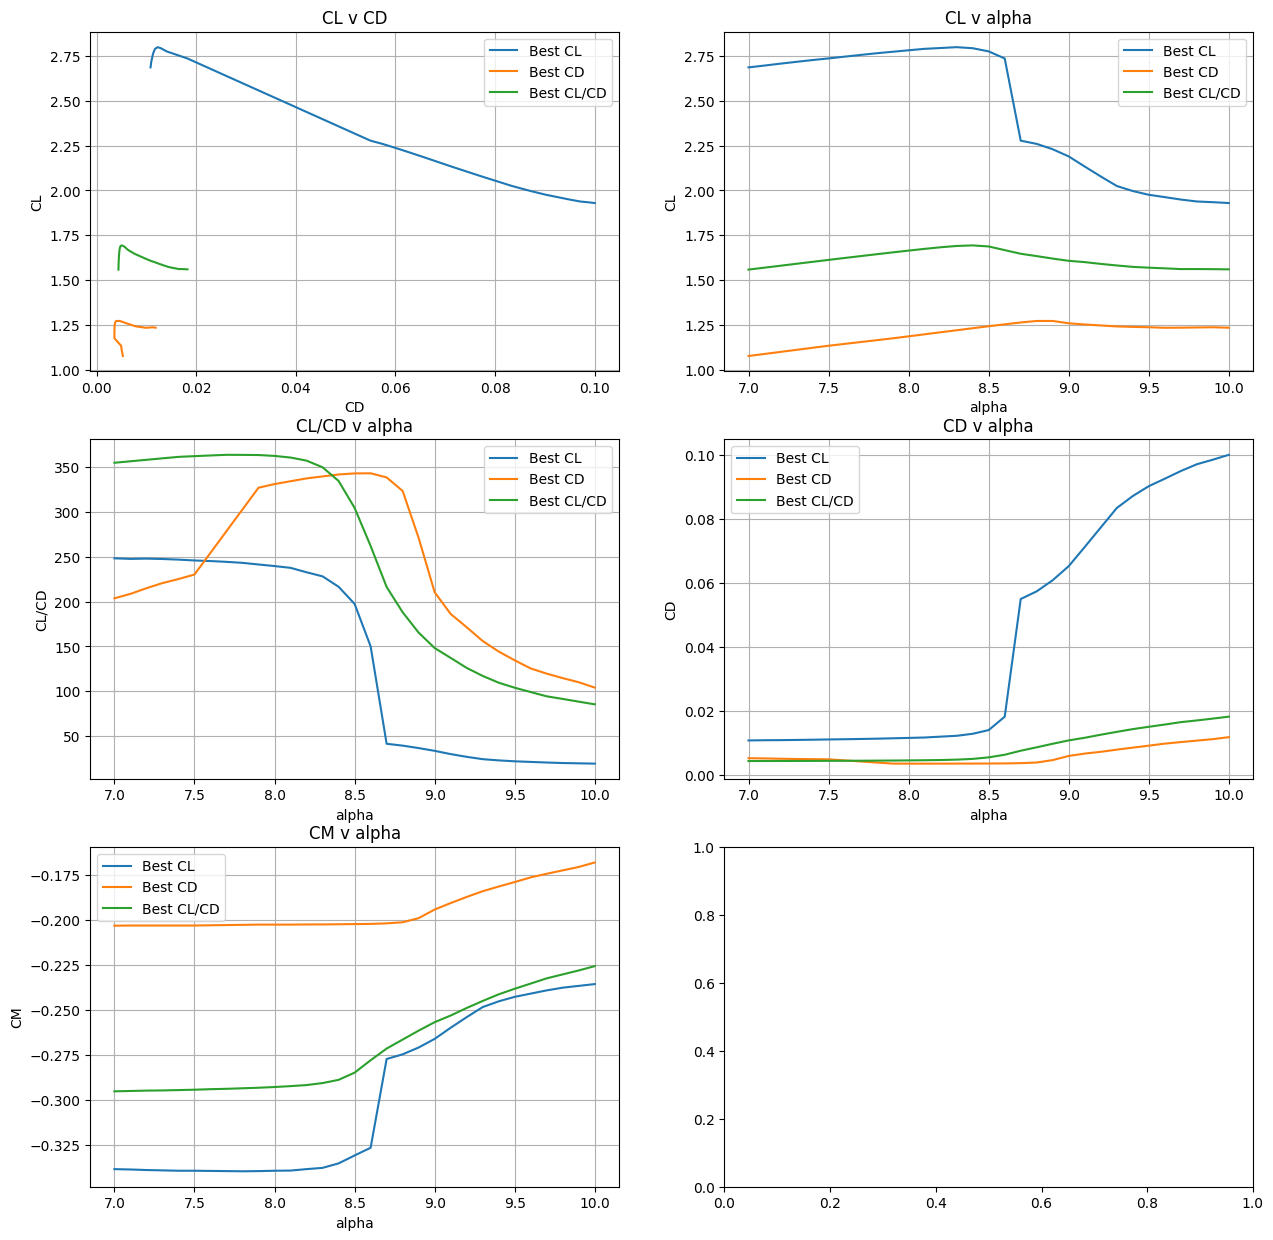

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0][0].plot(best_cl['CD'], best_cl['CL'], label='Best CL')
axs[0][0].plot(best_cd['CD'], best_cd['CL'], label='Best CD')
axs[0][0].plot(best_cl_o_cd['CD'], best_cl_o_cd['CL'], label='Best CL/CD')
axs[0][0].set_xlabel('CD')
axs[0][0].set_ylabel('CL')
axs[0][0].grid(True)
axs[0][0].set_title('CL v CD')

axs[0][1].plot(best_cl['alpha'], best_cl['CL'], label='Best CL')
axs[0][1].plot(best_cd['alpha'], best_cd['CL'], label='Best CD')
axs[0][1].plot(best_cl_o_cd['alpha'], best_cl_o_cd['CL'], label='Best CL/CD')
axs[0][1].set_xlabel('alpha')
axs[0][1].set_ylabel('CL')
axs[0][1].grid(True)
axs[0][1].set_title('CL v alpha')

axs[1][0].plot(best_cl['alpha'], [cl/cd for cl, cd in zip(best_cl['CL'], best_cl['CD'])], label='Best CL')
axs[1][0].plot(best_cd['alpha'], [cl/cd for cl, cd in zip(best_cd['CL'], best_cd['CD'])], label='Best CD')
axs[1][0].plot(best_cl_o_cd['alpha'], [cl/cd for cl, cd in zip(best_cl_o_cd['CL'], best_cl_o_cd['CD'])], label='Best CL/CD')
axs[1][0].set_xlabel('alpha')
axs[1][0].set_ylabel('CL/CD')
axs[1][0].grid(True)
axs[1][0].set_title('CL/CD v alpha')

axs[1][1].plot(best_cl['alpha'], best_cl['CD'], label='Best CL')
axs[1][1].plot(best_cd['alpha'], best_cd['CD'], label='Best CD')
axs[1][1].plot(best_cl_o_cd['alpha'], best_cl_o_cd['CD'], label='Best CL/CD')
axs[1][1].set_xlabel('alpha')
axs[1][1].set_ylabel('CD')
axs[1][1].grid(True)
axs[1][1].set_title('CD v alpha')

axs[2][0].plot(best_cl['alpha'], best_cl['CM'], label='Best CL')
axs[2][0].plot(best_cd['alpha'], best_cd['CM'], label='Best CD')
axs[2][0].plot(best_cl_o_cd['alpha'], best_cl_o_cd['CM'], label='Best CL/CD')
axs[2][0].set_xlabel('alpha')
axs[2][0].set_ylabel('CM')
axs[2][0].grid(True)
axs[2][0].set_title('CM v alpha')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
axs[2][0].legend()
fig.savefig('best_airfoil_cmp.png')

In [72]:
# Testing single alpha case
from xfoil import XFoil
xfoil_object_2 = XFoil("data/NACA0012.dat", 0, 1e6, [10], disable_graphics=True)
xfoil_object_2.run()

best_cl = xfoil_object_2.results[0]['result']
print(xfoil_object_2.results[0]['result'])

{'alpha': [10.0], 'CL': [1.0796], 'CD': [0.01508], 'CDp': [0.00916], 'CM': [0.0055], 'Top_Xtr': [0.0261], 'Bot_Xtr': [1.0]}
